In [1]:
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

# Utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
pd.options.display.max_columns = 100

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Importando el dataset

In [3]:
music_df = pd.read_csv( './data/msd_genre_dataset.txt' )

In [4]:
music_df.dtypes

genre              object
track_id           object
artist_name        object
title              object
loudness          float64
tempo             float64
time_signature      int64
key                 int64
mode                int64
duration          float64
avg_timbre1       float64
avg_timbre2       float64
avg_timbre3       float64
avg_timbre4       float64
avg_timbre5       float64
avg_timbre6       float64
avg_timbre7       float64
avg_timbre8       float64
avg_timbre9       float64
avg_timbre10      float64
avg_timbre11      float64
avg_timbre12      float64
var_timbre1       float64
var_timbre2       float64
var_timbre3       float64
var_timbre4       float64
var_timbre5       float64
var_timbre6       float64
var_timbre7       float64
var_timbre8       float64
var_timbre9       float64
var_timbre10      float64
var_timbre11      float64
var_timbre12      float64
dtype: object

In [5]:
music_df.head()

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,...,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,...,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,...,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,...,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,...,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,...,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


In [6]:
music_df[ 'genre' ].value_counts()

classic pop and rock     23895
folk                     13192
dance and electronica     4935
jazz and blues            4334
soul and reggae           4016
punk                      3200
metal                     2103
classical                 1874
pop                       1617
hip-hop                    434
Name: genre, dtype: int64

In [7]:
music_df.loc[ music_df[ 'genre' ] == 'classic pop and rock', 'genre' ] = 0
music_df.loc[ music_df[ 'genre' ] == 'folk', 'genre' ] = 1
music_df.loc[ music_df[ 'genre' ] == 'dance and electronica', 'genre' ] = 2
music_df.loc[ music_df[ 'genre' ] == 'jazz and blues', 'genre' ] = 3
music_df.loc[ music_df[ 'genre' ] == 'soul and reggae', 'genre' ] = 4
music_df.loc[ music_df[ 'genre' ] == 'punk', 'genre' ] = 5
music_df.loc[ music_df[ 'genre' ] == 'metal', 'genre' ] = 6
music_df.loc[ music_df[ 'genre' ] == 'classical', 'genre' ] = 7
music_df.loc[ music_df[ 'genre' ] == 'pop', 'genre' ] = 8
music_df.loc[ music_df[ 'genre' ] == 'hip-hop', 'genre' ] = 9

In [17]:
music_df[ 'genre' ] = music_df[ 'genre' ].astype( int )

In [18]:
X = music_df[ music_df.columns.tolist()[ 4: ] ]

In [19]:
Y = music_df[ 'genre' ]

In [20]:
# División la matriz de caracteristicas y el vector objetivo en los conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3 )

In [21]:
X_train.shape

(41720, 30)

In [22]:
X_test.shape

(17880, 30)

# Preprocessing

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )

In [24]:
X_test = scaler.transform( X_test )

# Redes Neuronales

In [25]:
# Creación del modelo de redes neuronales
neural_model = MLPClassifier( random_state = 5 )

In [26]:
# Ajuste del modelo a partir de los datos de entrenamiento
neural_model.fit( X_train, Y_train )

/Users/fabian/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=5, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [27]:
# Prediciendo a partir de los datos de prueba
predictions = neural_model.predict( X_test )

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), predictions.round().tolist() )
np.set_printoptions( precision = 2 )

Confusion matrix, without normalization
[[5655  766  237  143  169  140   50   24   26   16]
 [1339 2398   47  116   19    4    7   29   10    3]
 [ 462   53  756   71   63   19   18   18    7   11]
 [ 365  177   51  660   17    7    5   44    3    1]
 [ 598   50   75   30  354    6    1    1    8   16]
 [ 422   32   24    2   32  410   58    1    2    8]
 [ 128    9   21    2    1   47  396    1    0    1]
 [  52   39   22   27    5    0    2  389    1    0]
 [ 321   62   21    1   27    1    0    0   43    5]
 [  32    7   31    1   16    1    1    0    1   30]]


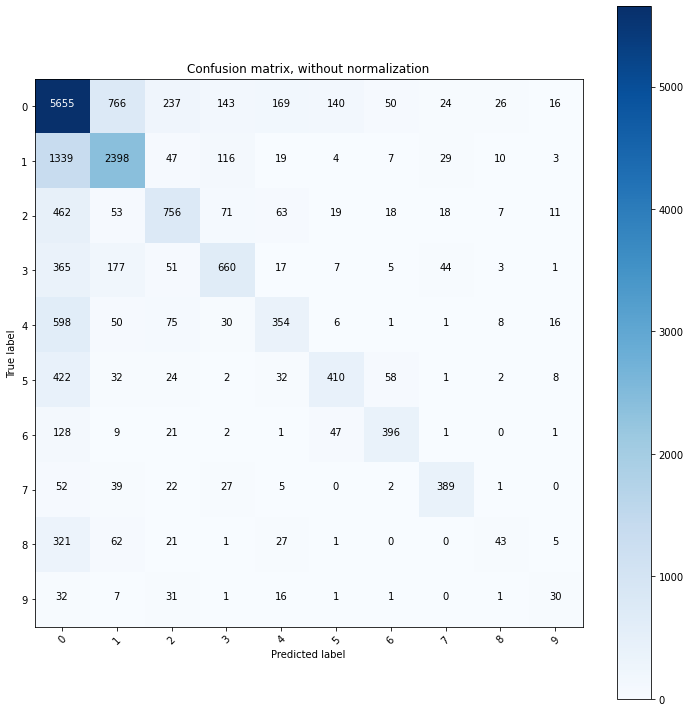

In [31]:
# Plot non-normalized confusion matrix
plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = range( 0, 10 ),
                      title = 'Confusion matrix, without normalization' )

Normalized confusion matrix
[[7.83e-01 1.06e-01 3.28e-02 1.98e-02 2.34e-02 1.94e-02 6.92e-03 3.32e-03
  3.60e-03 2.21e-03]
 [3.37e-01 6.04e-01 1.18e-02 2.92e-02 4.78e-03 1.01e-03 1.76e-03 7.30e-03
  2.52e-03 7.55e-04]
 [3.13e-01 3.59e-02 5.12e-01 4.80e-02 4.26e-02 1.29e-02 1.22e-02 1.22e-02
  4.74e-03 7.44e-03]
 [2.74e-01 1.33e-01 3.83e-02 4.96e-01 1.28e-02 5.26e-03 3.76e-03 3.31e-02
  2.26e-03 7.52e-04]
 [5.25e-01 4.39e-02 6.58e-02 2.63e-02 3.11e-01 5.27e-03 8.78e-04 8.78e-04
  7.02e-03 1.40e-02]
 [4.26e-01 3.23e-02 2.42e-02 2.02e-03 3.23e-02 4.14e-01 5.85e-02 1.01e-03
  2.02e-03 8.07e-03]
 [2.11e-01 1.49e-02 3.47e-02 3.30e-03 1.65e-03 7.76e-02 6.53e-01 1.65e-03
  0.00e+00 1.65e-03]
 [9.68e-02 7.26e-02 4.10e-02 5.03e-02 9.31e-03 0.00e+00 3.72e-03 7.24e-01
  1.86e-03 0.00e+00]
 [6.67e-01 1.29e-01 4.37e-02 2.08e-03 5.61e-02 2.08e-03 0.00e+00 0.00e+00
  8.94e-02 1.04e-02]
 [2.67e-01 5.83e-02 2.58e-01 8.33e-03 1.33e-01 8.33e-03 8.33e-03 0.00e+00
  8.33e-03 2.50e-01]]


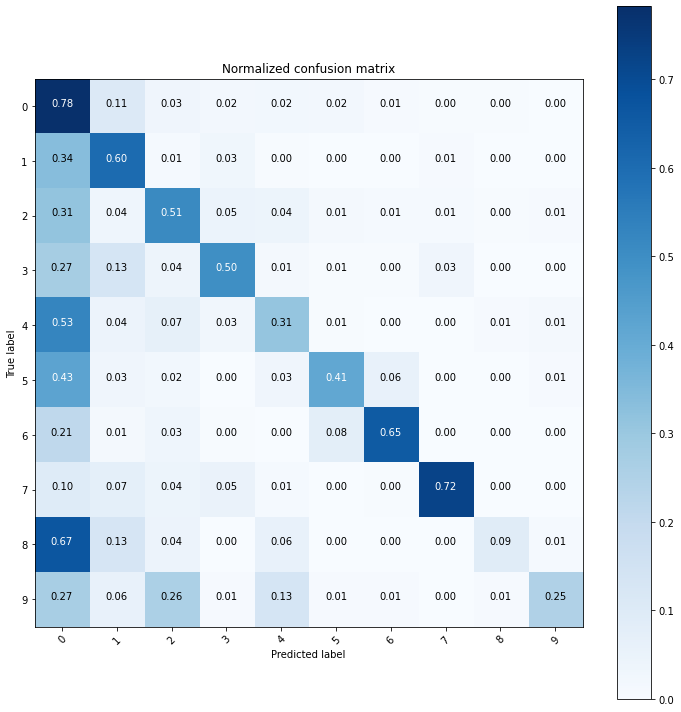

In [32]:
# Plot normalized confusion matrix
plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = range( 0, 10 ), normalize = True,
                      title = 'Normalized confusion matrix')